In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/SBAnational.csv')
df = df[['Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'GrAppv','MIS_Status']]

/tmp/ipykernel_74428/4173680187.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/SBAnational.csv')


In [4]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY        object
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
GrAppv            object
MIS_Status        object
dtype: object

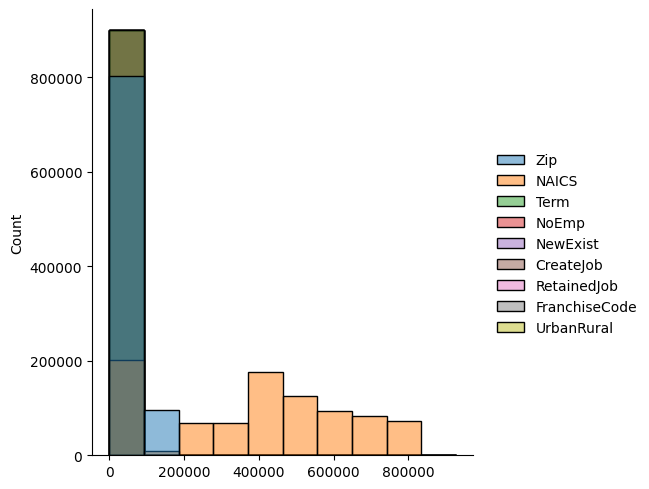

In [5]:
sns.displot(df,bins=10,kde=False)

In [6]:
#Selection de la feature importante
ser = pd.Series(df['Term']) 
ser

0          84
1          60
2         180
3          60
4         240
         ... 
899159     60
899160     60
899161    108
899162     60
899163     48
Name: Term, Length: 899164, dtype: int64

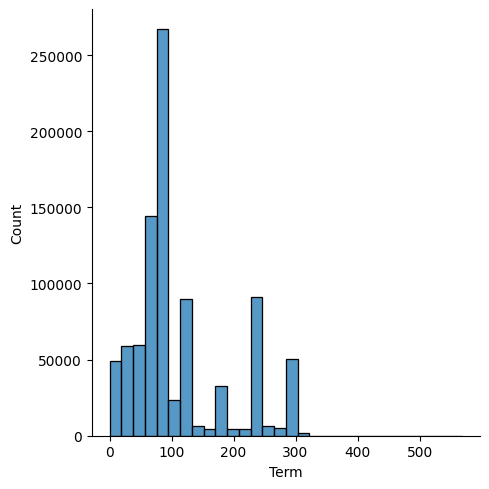

In [7]:
sns.displot(ser, bins=30, kde=False)

In [8]:
# Sachant que 1 bins = 20%, nous allons considérer qu'en dessous de 60 mois c'est peut être un outlier
ser[ser<60]

6         45
15        12
45        12
51        12
53        12
          ..
899138    42
899147    36
899151    12
899157    36
899163    48
Name: Term, Length: 176224, dtype: int64

In [9]:
#Nombre de ligne de ser moins celui de la condition
899164.000000 - 176224

722940.0

In [10]:
# Fonction pour supprimer les outliers
def fix_values(Term):
    if Term < 60:
        return 60
    else:
        return Term
    

In [11]:
#Applique la fonction 
ser.apply(fix_values)

0          84
1          60
2         180
3          60
4         240
         ... 
899159     60
899160     60
899161    108
899162     60
899163     60
Name: Term, Length: 899164, dtype: int64

In [12]:
# écrase les anciennes données
ser = ser.apply(fix_values)

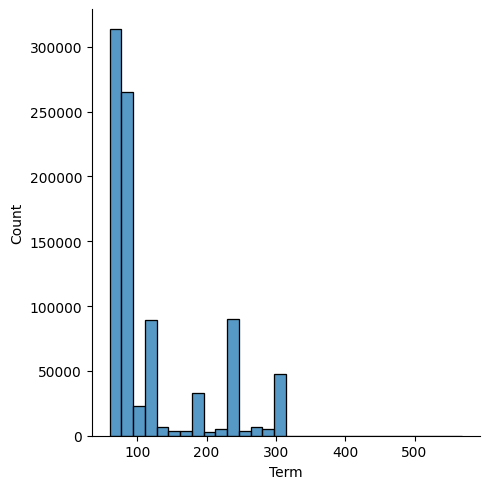

In [13]:
# Vérifications des outliers du nouveau ser
sns.displot(ser, bins=30, kde=False)

In [14]:
# Nous allons évaluer les relations entre les variables catégorielle et les numériques
from scipy.stats import chi2_contingency

# Sélectionne la colonne catégorielle et la colonne numérique
cat_column = df['Name']
num_column = df['Term']

# Calcule la table de contingence
cont_table = pd.crosstab(cat_column, num_column, margins=False)

# Calcule la statistique Chi² et la valeur p
chi2, p, _, _ = chi2_contingency(cont_table)

# Affiche les résultats
print(f"Statistique Chi² : {chi2:.2f}")
print(f"Valeur p : {p:.2f}")

Statistique Chi² : 322453079.55
Valeur p : 0.00


In [15]:
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'GrAppv', 'MIS_Status'],
      dtype='object')

In [16]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY        object
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
GrAppv            object
MIS_Status        object
dtype: object

In [17]:
# Nous allons évaluer les relations entre les variables catégorielle et les numériques
from scipy.stats import chi2_contingency

chi2_results = []

# Boucle au travers de toutes les colonnes objets
for col in df.select_dtypes('object').columns:
    # Passe la target
    if col == 'Term':
        continue
    # Calcul la table de contingence
    cont_table = pd.crosstab(df[col], df['Term'], margins=False)
    # Calcul du chi2 et de la p_Value
    chi2, p, _, _, = chi2_contingency(cont_table)
    # Créer un dico pour les resultats
    result = {'column' : col, 'chi2' : chi2, 'p_value': p}
    # Ajoute le resultat 
    chi2_results.append(result)

# Tri les resultats par chi2
chi2_results_sorted = sorted(chi2_results, key=lambda x: x['chi2'], reverse=True)

#Affiche les resultats
for result in chi2_results:
    print(f"Column: {result['column']}, Chi²: {result['chi2']:.2f}, p-value: {result['p_value']:.2f}")

Column: Name, Chi²: 322453079.55, p-value: 0.00
Column: City, Chi²: 15527849.38, p-value: 0.00
Column: State, Chi²: 192792.74, p-value: 0.00
Column: Bank, Chi²: 5090296.72, p-value: 0.00
Column: BankState, Chi²: 354718.65, p-value: 0.00
Column: ApprovalDate, Chi²: 12124382.27, p-value: 0.00
Column: ApprovalFY, Chi²: 481840.53, p-value: 0.00
Column: RevLineCr, Chi²: 238035.65, p-value: 0.00
Column: LowDoc, Chi²: 50290.84, p-value: 0.00
Column: GrAppv, Chi²: 19153699.22, p-value: 0.00
Column: MIS_Status, Chi²: 524216.23, p-value: 0.00


In [18]:
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'GrAppv', 'MIS_Status'],
      dtype='object')

In [19]:
from feature_engine.imputation import CategoricalImputer
from sklearn.preprocessing import LabelBinarizer

imputer = CategoricalImputer(imputation_method='frequent', variables=['MIS_Status'])
df = imputer.fit_transform(df)

df.MIS_Status = LabelBinarizer().fit_transform(df.loc[:,['MIS_Status']])
df.MIS_Status = df.MIS_Status.astype('int')

<Axes: xlabel='Term', ylabel='MIS_Status'>

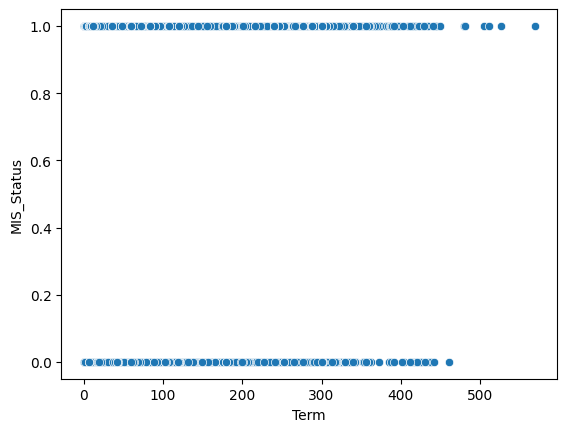

In [20]:
sns.scatterplot(x='Term',y='MIS_Status',data=df)

In [21]:
df[(df['Term'] > 450) & ((df['MIS_Status'] >= 1) | (df['MIS_Status'] <= 1))]


,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,MIS_Status
43031,CONTAINER SERVICES,DEPTFORD,NJ,8096,BANK OF AMERICA NATL ASSOC,NC,0,29-Dec-81,1982,461,7,1.0,0,0,0,0,N,N,"$150,000.00",0
134281,HOWELL'S JACK & JILL,NESS CITY (NESS),KS,67560,"GREAT PLAINS DEVELOPMENT, INC.",KS,0,27-Jul-84,1984,480,23,1.0,0,0,0,0,N,N,"$264,000.00",1
336404,MINO CONSTRUCTION,YORBA LINDA,CA,92685,WELLS FARGO BANK NATL ASSOC,SD,0,30-Nov-88,1989,481,5,1.0,0,0,0,0,N,N,"$203,000.00",1
388198,THE INN ON THE LIBRARY LAWN,WESTPORT,NY,12993,JPMORGAN CHASE BANK NATL ASSOC,NY,0,12-Jan-90,1990,505,46,1.0,0,0,1,0,N,N,"$307,000.00",1
495391,PACIFIC SURF PROPERTIES,EL CAJON,CA,92020,COMERICA BANK,TX,721110,7-Aug-01,2001,527,6,1.0,0,0,1,1,N,N,"$1,332,000.00",1
550621,D & D'S FLOORING & INTERIORS,CHARLOTTE,NC,28207,"READYCAP LENDING, LLC",CA,442210,17-May-02,2002,569,2,1.0,0,2,1,1,0,N,"$515,000.00",1
784238,"MASTER POTATOES, INC.",PLYMOUTH,MN,55447,ASSOCIATED BANK NATL ASSOC,MN,0,5-May-95,1995,511,5,2.0,0,0,1,0,N,Y,"$72,500.00",1


In [22]:
df[(df['Term'] > 450) & ((df['MIS_Status'] >= 1) | (df['MIS_Status'] <= 1))].index


Index([43031, 134281, 336404, 388198, 495391, 550621, 784238], dtype='int64')

In [23]:
ind_TermMS_drop = df[(df['Term'] > 450) & ((df['MIS_Status'] >= 1) | (df['MIS_Status'] <= 1))].index


In [24]:
df.drop(ind_TermMS_drop,axis=0, inplace=True)

Traitement des données manquantes

In [26]:
len(df.columns)

20

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899157 entries, 0 to 899163
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           899143 non-null  object 
 1   City           899127 non-null  object 
 2   State          899143 non-null  object 
 3   Zip            899157 non-null  int64  
 4   Bank           897598 non-null  object 
 5   BankState      897591 non-null  object 
 6   NAICS          899157 non-null  int64  
 7   ApprovalDate   899157 non-null  object 
 8   ApprovalFY     899157 non-null  object 
 9   Term           899157 non-null  int64  
 10  NoEmp          899157 non-null  int64  
 11  NewExist       899021 non-null  float64
 12  CreateJob      899157 non-null  int64  
 13  RetainedJob    899157 non-null  int64  
 14  FranchiseCode  899157 non-null  int64  
 15  UrbanRural     899157 non-null  int64  
 16  RevLineCr      894629 non-null  object 
 17  LowDoc         896575 non-null  ob

In [28]:
df.isnull().sum()

Name               14
City               30
State              14
Zip                 0
Bank             1559
BankState        1566
NAICS               0
ApprovalDate        0
ApprovalFY          0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
GrAppv              0
MIS_Status          0
dtype: int64

In [29]:
100* df.isnull().sum() / len(df)

Name             0.001557
City             0.003336
State            0.001557
Zip              0.000000
Bank             0.173385
BankState        0.174163
NAICS            0.000000
ApprovalDate     0.000000
ApprovalFY       0.000000
Term             0.000000
NoEmp            0.000000
NewExist         0.015125
CreateJob        0.000000
RetainedJob      0.000000
FranchiseCode    0.000000
UrbanRural       0.000000
RevLineCr        0.503583
LowDoc           0.287158
GrAppv           0.000000
MIS_Status       0.000000
dtype: float64

In [30]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [31]:
percent_nan = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Name'),
  Text(1, 0, 'State'),
  Text(2, 0, 'City'),
  Text(3, 0, 'NewExist'),
  Text(4, 0, 'Bank'),
  Text(5, 0, 'BankState'),
  Text(6, 0, 'LowDoc'),
  Text(7, 0, 'RevLineCr')])

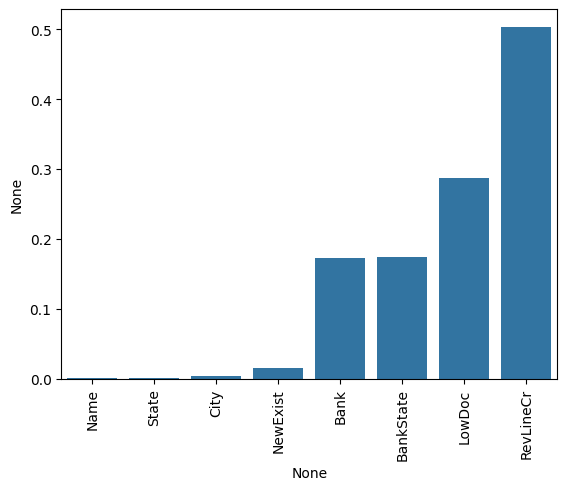

In [32]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [33]:
percent_nan

Name         0.001557
State        0.001557
City         0.003336
NewExist     0.015125
Bank         0.173385
BankState    0.174163
LowDoc       0.287158
RevLineCr    0.503583
dtype: float64

In [34]:
percent_nan[percent_nan < 1]

Name         0.001557
State        0.001557
City         0.003336
NewExist     0.015125
Bank         0.173385
BankState    0.174163
LowDoc       0.287158
RevLineCr    0.503583
dtype: float64

In [35]:
len(df)

899157

In [36]:
100/len(df)

0.00011121528275929566

In [37]:
( 0.001557/100)*len(df)

13.999874490000002

In [38]:
df['NewExist'].isnull().sum()

136

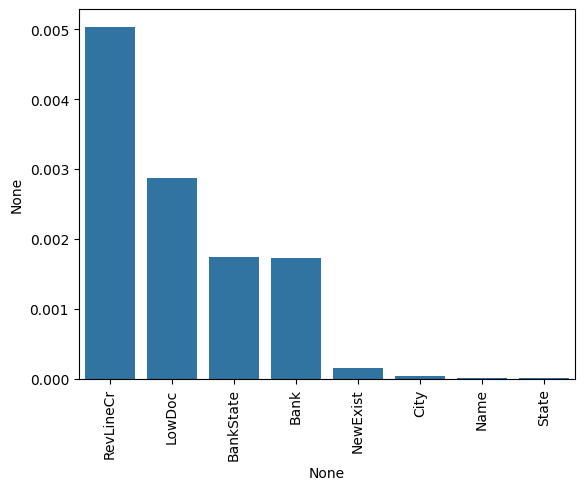

In [39]:
percent_nan = df.isnull().sum() / len(df)
sorted_columns = percent_nan[percent_nan>0].sort_values(ascending=False).index
sns.barplot(x=sorted_columns, y=percent_nan[sorted_columns])
plt.xticks(rotation=90)
plt.show()

(0.0, 4e-05)

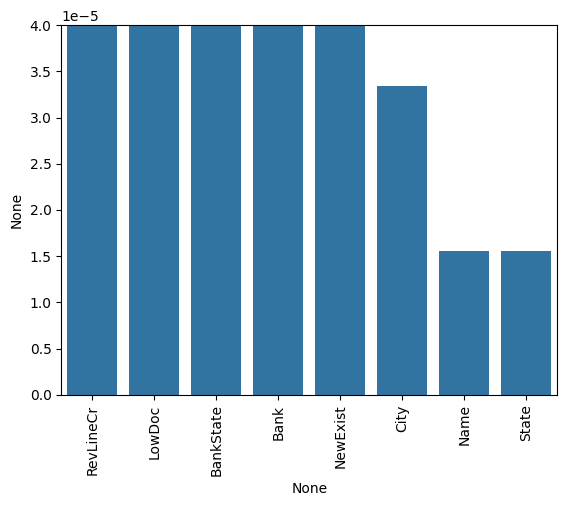

In [40]:
sns.barplot(x=sorted_columns, y=percent_nan[sorted_columns])
plt.xticks(rotation=90)
# Fixer le seuil (threshold) à 1%
plt.ylim(0,0.000040 )

In [41]:
percent_nan[percent_nan < 0.000034].sort_values()

Zip              0.000000
NAICS            0.000000
ApprovalDate     0.000000
ApprovalFY       0.000000
Term             0.000000
NoEmp            0.000000
CreateJob        0.000000
RetainedJob      0.000000
FranchiseCode    0.000000
UrbanRural       0.000000
GrAppv           0.000000
MIS_Status       0.000000
Name             0.000016
State            0.000016
City             0.000033
dtype: float64

In [42]:
columns_to_drop = df.columns[percent_nan < 0.000034]

In [43]:
df[columns_to_drop].drop(columns_to_drop, axis=1, inplace=True)

/tmp/ipykernel_74428/2098691882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_drop].drop(columns_to_drop, axis=1, inplace=True)


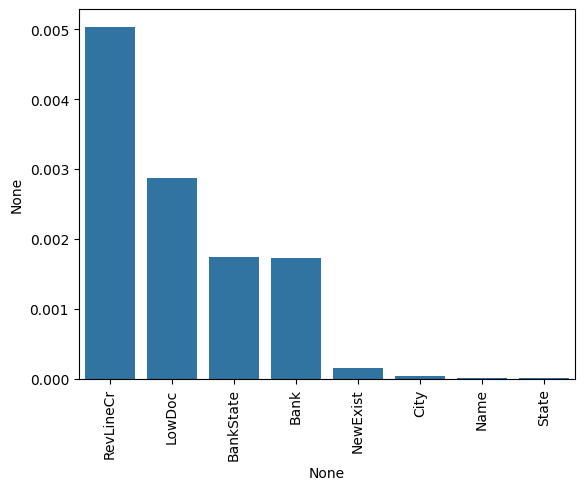

In [44]:
percent_nan = df.isnull().sum() / len(df)
sorted_columns = percent_nan[percent_nan>0].sort_values(ascending=False).index
sns.barplot(x=sorted_columns, y=percent_nan[sorted_columns])
plt.xticks(rotation=90)
plt.show()

(0.0, 0.002)

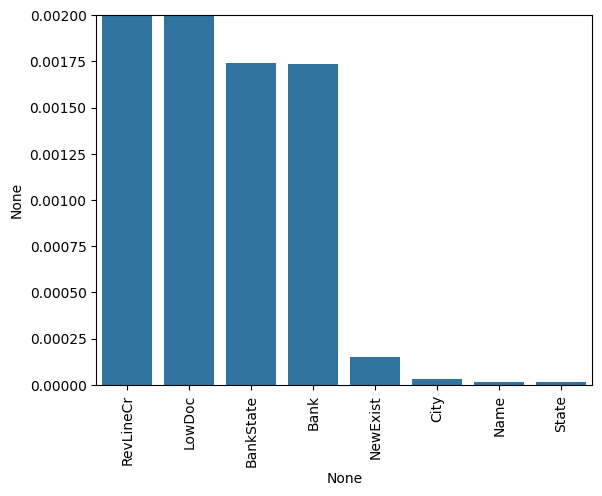

In [45]:
sns.barplot(x=sorted_columns, y=percent_nan[sorted_columns])
plt.xticks(rotation=90)
# Fixer le seuil (threshold) à 1%
plt.ylim(0,0.002 )

In [110]:
percent_nan[percent_nan < 0.0025].sort_values()

Name     0.001448
State    0.002252
dtype: float64

In [111]:
columns_to_drop = df.columns[percent_nan < 0.0025]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 3

In [48]:
df[columns_to_drop].drop(columns_to_drop, axis=1,inplace=True)

/tmp/ipykernel_74428/3369650424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_drop].drop(columns_to_drop, axis=1,inplace=True)


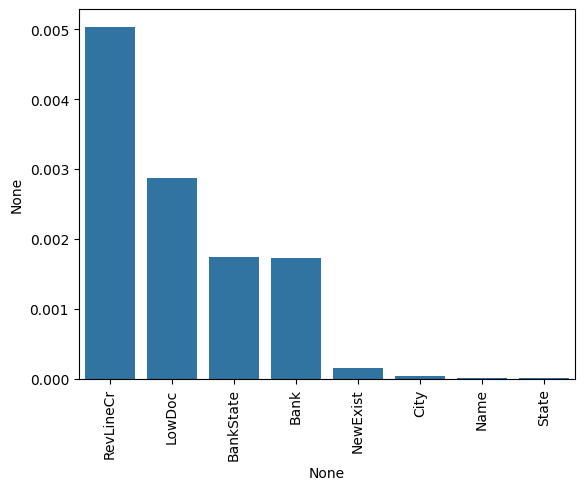

In [49]:
percent_nan = df.isnull().sum() / len(df)
sorted_columns = percent_nan[percent_nan>0].sort_values(ascending=False).index
sns.barplot(x=sorted_columns, y=percent_nan[sorted_columns])
plt.xticks(rotation=90)
plt.show()

In [50]:
sorted_columns.value_counts()

RevLineCr    1
LowDoc       1
BankState    1
Bank         1
NewExist     1
City         1
Name         1
State        1
Name: count, dtype: int64

In [51]:
unique_values = percent_nan.value_counts()
print(unique_values)

0.000000    12
0.000016     2
0.000033     1
0.001734     1
0.001742     1
0.000151     1
0.005036     1
0.002872     1
Name: count, dtype: int64


In [52]:
percent_nan.sort_values()

Term             0.000000
UrbanRural       0.000000
FranchiseCode    0.000000
RetainedJob      0.000000
CreateJob        0.000000
NoEmp            0.000000
GrAppv           0.000000
ApprovalFY       0.000000
MIS_Status       0.000000
NAICS            0.000000
Zip              0.000000
ApprovalDate     0.000000
State            0.000016
Name             0.000016
City             0.000033
NewExist         0.000151
Bank             0.001734
BankState        0.001742
LowDoc           0.002872
RevLineCr        0.005036
dtype: float64

In [53]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY        object
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
GrAppv            object
MIS_Status         int64
dtype: object

In [54]:
percent_nan_num_cols = ['NewExist']
df[percent_nan_num_cols] = df[percent_nan_num_cols].fillna(0)

In [55]:
percent_nan_cols =  [ 'BankState','Bank' ]
df[percent_nan_cols] = df[percent_nan_cols].fillna('None')

In [56]:
percent_nan = percent_missing(df)

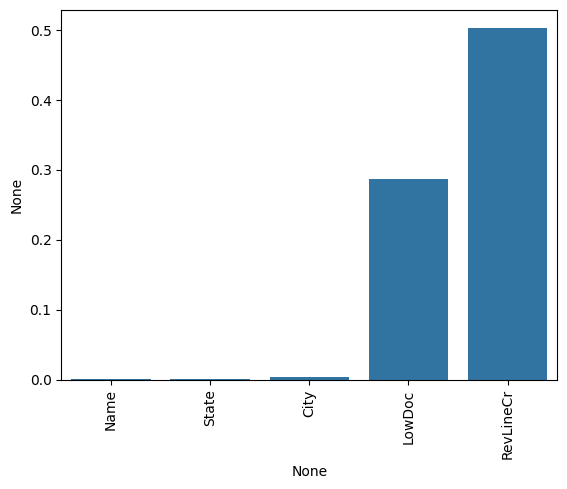

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [58]:
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'GrAppv', 'MIS_Status'],
      dtype='object')

In [59]:
df['GrAppv'].unique()

array(['$60,000.00 ', '$40,000.00 ', '$287,000.00 ', ..., '$12,480.00 ',
       '$62,425.00 ', '$1,086,300.00 '], dtype=object)

In [60]:
# Supprimer le signe dollar 
df['GrAppv'] = df['GrAppv'].apply(lambda x: x.replace('$', ''))

# supprimer la virgule
df['GrAppv'] = df['GrAppv'].apply(lambda x: x.replace(',', ''))

# supprimer le point
df['GrAppv'] = df['GrAppv'].apply(lambda x: x.replace('.', ''))

# Convertir en int
df['GrAppv'] = df['GrAppv'].astype(int) 

In [61]:
df['GrAppv'].unique()

array([  6000000,   4000000,  28700000, ...,   1248000,   6242500,
       108630000])

In [62]:
df[['GrAppv','LowDoc']].dtypes

GrAppv     int64
LowDoc    object
dtype: object

In [63]:
# Remplacement des valeurs '[C,S,A,R,1,0]' par NaN
df.loc[df['LowDoc'].isin(['C','S','A','R','1','0']), 'LowDoc'] = np.nan

# Remplacement de 'N' par 0 et 'Y' par 1
df.loc[df['LowDoc'] == 'N', 'LowDoc'] = 0
df.loc[df['LowDoc'] == 'Y', 'LowDoc'] = 1

# Remplacement des valeurs différentes de 0 et 1 par NaN
df.loc[~df['LowDoc'].isin([0,1]), 'LowDoc'] = np.nan
df['LowDoc'].astype(float)

0         1.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
899159    0.0
899160    0.0
899161    0.0
899162    1.0
899163    0.0
Name: LowDoc, Length: 899157, dtype: float64

In [64]:
df[['GrAppv','LowDoc']].dtypes

GrAppv     int64
LowDoc    object
dtype: object

In [65]:
df.groupby('GrAppv')['LowDoc'].mean().unique()

array([0.0, 0.0022522522522522522, 0.017543859649122806,
       0.14285714285714285, 0.5, 0.10740740740740741, 0.05454545454545454,
       0.20085470085470086, 0.1, 0.24324324324324326, 0.3333333333333333,
       0.05555555555555555, 1.0, 0.125, 0.1927710843373494, 0.25,
       0.08333333333333333, 0.05309734513274336, 0.16666666666666666,
       0.1111111111111111, 0.0075140226478992485, 0.09090909090909091,
       0.208955223880597, 0.0625, 0.07692307692307693,
       0.06828703703703703, 0.05128205128205128, 0.2727272727272727,
       0.13636363636363635, 0.11666666666666667, 0.05,
       0.09523809523809523, 0.047619047619047616, 0.08860759493670886,
       0.04, 0.10810810810810811, 0.08, 0.04702750665483585,
       0.08695652173913043, 0.15384615384615385, 0.13143631436314362,
       0.11428571428571428, 0.07142857142857142, 0.2413793103448276,
       0.11904761904761904, 0.06976744186046512, 0.19230769230769232,
       0.21739130434782608, 0.18384401114206128, 0.1025641025641025

In [66]:
df.head()['LowDoc']

0    1
1    1
2    0
3    1
4    0
Name: LowDoc, dtype: object

In [67]:
df[df['LowDoc'].isnull()]

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,MIS_Status
7413,MILLER-ST. NAZIANZ INC,ST. NAZIANZ,WI,54232,WISCONSIN BUS. DEVEL FINAN COR,WI,333111,16-Feb-06,2006,240,130,1.0,0,130,1,2,0,NaN,130600000,1
23459,MANOLO'S CAFE,DEMING,NM,88031,FIRST NEW MEXICO BANK,NM,722110,27-Feb-06,2006,120,7,2.0,0,0,1,1,N,NaN,16000000,1
30877,THE BAD ASS COFFEE COMPANY,EL PASO,TX,79938,STEARNS BK NATL ASSOC,MN,722213,2-Mar-06,2006,120,5,2.0,0,0,8023,1,N,NaN,18900000,1
35740,CHESTNUT COMMONS LASER WSH LLC,AVON LAKE,OH,44012,THE LORAIN NATIONAL BANK,OH,811192,6-Mar-06,2006,252,2,2.0,0,0,1,1,N,NaN,120000000,1
36376,"Xcel Transportation, LLC",Martinsville,VA,24112,SUNTRUST BANK,GA,484110,22-Apr-05,2005,83,1,1.0,2,1,1,2,Y,NaN,25000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886336,CONSTRUCTION AND ENVIRONMENTAL,EL PASO,TX,79901,UNITED BK OF EL PASO DEL NORTE,TX,541620,19-Jan-06,2006,60,16,1.0,0,0,1,1,Y,NaN,20000000,1
886363,PLASTIC MOLDING TECHNOLOGY INC,EL PASO,TX,79922,COMPASS BANK,TX,326199,19-Jan-06,2006,84,71,1.0,0,0,1,1,N,NaN,200000000,1
887812,TRANS AMERICAN COMMUNICATIONS,EL PASO,TX,79925,CAPITAL CERT. DEVEL CORP,TX,238990,23-Jan-06,2006,240,15,1.0,4,0,1,1,0,NaN,13100000,1
891829,"DESERT SUN CHIROPRACTIC, PLLC",EL PASO,TX,79902,FIRST NATIONAL BANK,TX,621310,2-Feb-06,2006,84,3,2.0,0,0,1,1,N,NaN,13500000,1


In [68]:
df.groupby('GrAppv')['LowDoc'].transform(lambda val: val.fillna(val.mean()))

/tmp/ipykernel_74428/909105816.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.groupby('GrAppv')['LowDoc'].transform(lambda val: val.fillna(val.mean()))


0         1.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
899159    0.0
899160    0.0
899161    0.0
899162    1.0
899163    0.0
Name: LowDoc, Length: 899157, dtype: float64

In [69]:
df['LowDoc'] = df.groupby('GrAppv')['LowDoc'].transform(lambda val: val.fillna(val.mean()))

/tmp/ipykernel_74428/2801851375.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LowDoc'] = df.groupby('GrAppv')['LowDoc'].transform(lambda val: val.fillna(val.mean()))


In [70]:
df['LowDoc'].isnull().value_counts()

LowDoc
False    899066
True         91
Name: count, dtype: int64

In [71]:
df['LowDoc'].isna().sum()

91

In [72]:
df['LowDoc'][df['LowDoc'].isna()]

99067    NaN
102757   NaN
103297   NaN
111142   NaN
133283   NaN
          ..
774462   NaN
814480   NaN
832322   NaN
840958   NaN
848963   NaN
Name: LowDoc, Length: 91, dtype: float64

In [73]:
missing_lowdoc = df['LowDoc'][df['LowDoc'].isna()].index.sort_values()
missing_GrAppv = df['GrAppv'][df.index.isin(missing_lowdoc)]
print(missing_GrAppv)

99067     37842000
102757     7289800
103297    97185100
111142    32771500
133283     5196000
            ...   
774462     3367100
814480     9540500
832322    18583100
840958    28325900
848963    34263800
Name: GrAppv, Length: 91, dtype: int64


In [74]:
df.loc[df['GrAppv'] < 150000, 'LowDoc'] = 0.0
df.loc[df['GrAppv'] >= 150000, 'LowDoc'] = 1.0

In [75]:
ind_LD_drop = df['LowDoc'][df['LowDoc'].isna()]  

In [76]:
df.drop(ind_LD_drop,axis=0, inplace=True)

In [77]:
percent_nan = percent_missing(df)

In [78]:
percent_nan

Name         0.001557
State        0.001557
City         0.003336
RevLineCr    0.503583
dtype: float64

In [79]:

chi2_results = []

# Boucle au travers de toutes les colonnes objets
for col in df.select_dtypes('object').columns:
    # Passe la target
    if col == 'RevLineCr':
        continue
    # Calcul la table de contingence
    cont_table = pd.crosstab(df[col], df['RevLineCr'], margins=False)
    # Calcul du chi2 et de la p_Value
    chi2, p, _, _, = chi2_contingency(cont_table)
    # Créer un dico pour les resultats
    result = {'column' : col, 'chi2' : chi2, 'p_value': p}
    # Ajoute le resultat 
    chi2_results.append(result)

# Tri les resultats par chi2
chi2_results_sorted = sorted(chi2_results, key=lambda x: x['chi2'], reverse=True)

#Affiche les resultats
for result in chi2_results:
    print(f"Column: {result['column']}, Chi²: {result['chi2']:.2f}, p-value: {result['p_value']:.2f}")

Column: Name, Chi²: 13055092.86, p-value: 1.00
Column: City, Chi²: 325585.26, p-value: 1.00
Column: State, Chi²: 58126.39, p-value: 0.00
Column: Bank, Chi²: 437616.79, p-value: 0.00
Column: BankState, Chi²: 213869.37, p-value: 0.00
Column: ApprovalDate, Chi²: 529937.18, p-value: 0.00
Column: ApprovalFY, Chi²: 438296.61, p-value: 0.00


Le chi² le plus élevé dans cette liste est 529937.18 pour la colonne ApprovalDate.

In [80]:
df['ApprovalDate'].unique()

array(['28-Feb-97', '2-Jun-80', '7-Feb-06', ..., '24-Feb-97', '25-Feb-97',
       '27-Feb-97'], dtype=object)

Imputer les données manquantes en fonction d'autres features

In [81]:
df.groupby('ApprovalDate')['RevLineCr']

In [82]:
df['RevLineCr']

0         N
1         N
2         N
3         N
4         N
         ..
899159    0
899160    Y
899161    N
899162    N
899163    N
Name: RevLineCr, Length: 899157, dtype: object

In [83]:
df['RevLineCr'].value_counts()

RevLineCr
N    420282
0    257601
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

In [84]:
# Mappez les valeurs 'Y' et 'N' aux valeurs numériques correspondantes
mapping = {'Y': 1, 'N': 0}
df['RevLineCr'] = df['RevLineCr'].map(mapping)


In [85]:
df['RevLineCr'].unique()

array([ 0., nan,  1.])

In [86]:
df = df.dropna(subset=['RevLineCr'])

In [87]:
percent_nan = percent_missing(df)

([0, 1, 2], [Text(0, 0, 'Name'), Text(1, 0, 'State'), Text(2, 0, 'City')])

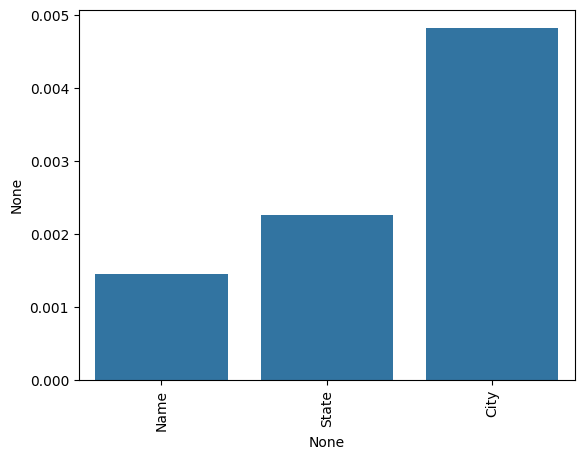

In [88]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

On pourrait tenter d'imputer des données dans ces dernières colonnes mais la gestion du temps reste importante. La modelisation doit avancer

In [89]:
df.isna().sum()

Name              9
City             30
State            14
Zip               0
Bank              0
BankState         0
NAICS             0
ApprovalDate      0
ApprovalFY        0
Term              0
NoEmp             0
NewExist          0
CreateJob         0
RetainedJob       0
FranchiseCode     0
UrbanRural        0
RevLineCr         0
LowDoc            0
GrAppv            0
MIS_Status        0
dtype: int64

In [90]:
df = df.dropna()

In [91]:
df.isna().sum()

Name             0
City             0
State            0
Zip              0
Bank             0
BankState        0
NAICS            0
ApprovalDate     0
ApprovalFY       0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
GrAppv           0
MIS_Status       0
dtype: int64

In [92]:
df.to_csv("SBA_no_missing_data.csv",index=False)

In [93]:
df= pd.read_csv('SBA_no_missing_data.csv')

/tmp/ipykernel_74428/3183846193.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('SBA_no_missing_data.csv')


In [113]:
df.isna().sum()

Name                0
City                0
State               0
Zip                 0
Bank             1529
BankState        1535
NAICS               0
ApprovalDate        0
ApprovalFY          0
Term                0
NoEmp               0
NewExist            0
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr           0
LowDoc              0
GrAppv              0
MIS_Status          0
dtype: int64